# Non- linear regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('3.3_data.csv')
df.head()

,x,y
0,-5.000000,-0.135278
1,-4.984985,0.038593
2,-4.969970,0.034703
3,-4.954955,0.221296
4,-4.939940,-0.100397


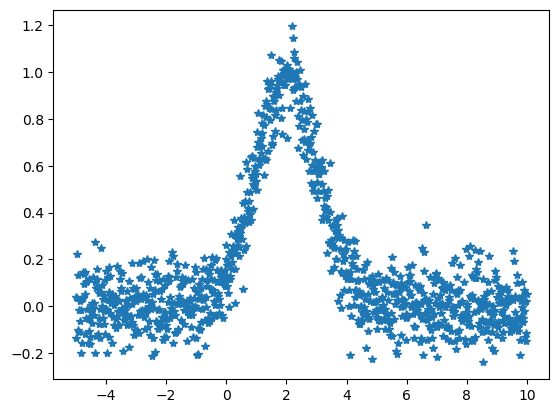

In [11]:
# plotting data to see what shape it looks like
X = df.x.values
Y = df.y.values
plt.plot(X,Y,'*')
plt.show()


The above plot of data looks like having a complex function but we will assume its a polynomial and proceed

Non linear--> polynomial expansion. To proceed with polynomial we will get the column set and going to create different power of this column for e.g column set of power of 2 and power of 3 wich wil give me a polynomial expansion and will use this coulmn expansion to create a multiline model on these polynomial features and try to fit the the way which will be my non-linear approximation

In [14]:
from sklearn.preprocessing import PolynomialFeatures # this will help in genearting different powers of the variable
from sklearn.linear_model import LinearRegression

N = 5 # this is the number of power we want to create for our feature means we will create upto 2,3,4,5 power i.e x,x^2,x^3,x^4,x^5

poly = PolynomialFeatures(degree = N, include_bias = True) # bias means a constant term here
x_poly = poly.fit_transform(df[['x']]) # this column x will have polynomial expansion of degree 5

df_poly = pd.DataFrame(x_poly, columns =  [f'x^{i}' for i in range(0,6) ]) # this will give me a new dataframe with poly nomial expansion of x^0, x^1,x^2,x^3,x^4,x^5
df_extended = pd.concat([df_poly,df['y']],axis =1)
df_extended.sample(4)

,x^0,x^1,x^2,x^3,x^4,x^5,y
792,1.0,6.891892,47.498174,327.352279,2256.076519,15548.635469,0.052270
527,1.0,2.912913,8.485062,24.716246,71.996271,209.718867,0.578365
48,1.0,-4.279279,18.312231,-78.363151,335.337810,-1435.004141,-0.117740
186,1.0,-2.207207,4.871764,-10.752992,23.734081,-52.386035,-0.082096


In [16]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_extended, test_size=0.2, random_state=123)
X_train = df_train[['x^0','x^1','x^2','x^3','x^4','x^5']]
Y_train = df_train['y']

X_test = df_train[['x^0','x^1','x^2','x^3','x^4','x^5']]
Y_test = df_train['y']

In [17]:
NL_model = LinearRegression().fit(X_train, Y_train)

print(NL_model.coef_)
print(NL_model.intercept_)
print(NL_model.score(X_train, Y_train)) # error score

[ 0.00000000e+00  1.59888522e-01 -4.02619775e-02 -5.43507026e-03
  1.35054172e-03 -5.97201666e-05]
0.4228120304792486
0.594130688422761


Now lets try to obtain the function of polynomial with teh coeffcients that we have received and lets compareit with real values

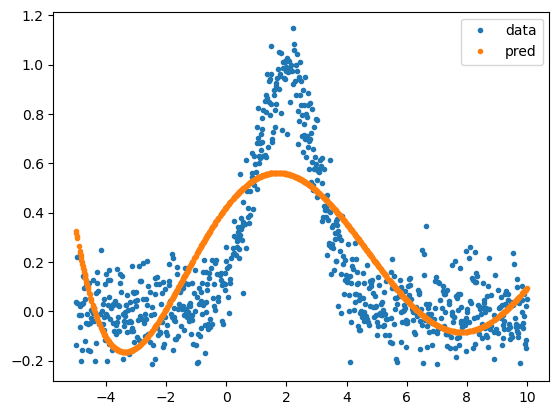

In [24]:
Y_train_pred = NL_model.predict(X_train)
x = X_train['x^1']

plt.plot(x,Y_train, '.', label= 'data')
plt.plot(x,Y_train_pred, '.', label= 'pred')
plt.legend()
plt.show()

Here in above graph, my pred is good with actual but in practical session the lecturer had different dataset and for his dataset the predicted model was not very close to actual so he again increased the number of degree. I will execute thathere so that it might helmp me in future for revision. we wil repeat the same task for many degree of polynomial and will see at which point the score is not decreasing anymore. that will be our final polynoial expansion equation. We will defne a function that will perform this repeated task of polynomial expansion

In [25]:
X = df[['x']]
Y = df[['y']]

def get_score_poly(N):
    poly = PolynomialFeatures(degree = N, include_bias = True)
    X_poly = poly.fit_transform(X)
    X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=123)
    NL_model = LinearRegression().fit(X_train_poly, Y_train)
    score = NL_model.score(X_train_poly, Y_train)
    return score

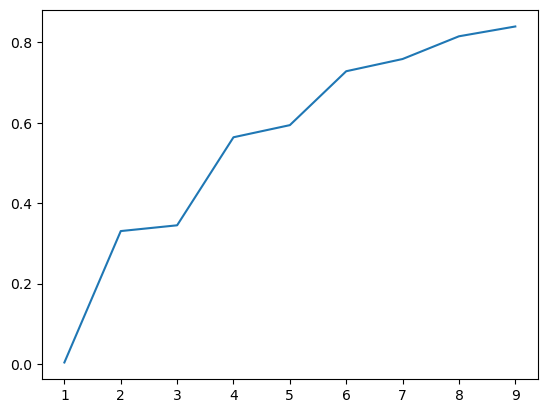

In [28]:
arr_scores = [] # this will store list of N 

for N in range(1,10):
    arr_scores.append(get_score_poly(N))

plt.plot(range(1,10), arr_scores)
plt.show()

From above graph we see that for N =5 our score was somewhere near 6 or between 5 and 6 and to get more score of 0.8 on y axis we need to get N = 8 or 9 so lets cross check if its true

In [31]:
# lets check by putting the N = 8

poly = PolynomialFeatures(degree = 8, include_bias = True)

X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2,random_state = 123)
NL_model = LinearRegression().fit(X_train_poly, Y_train)

print(NL_model.coef_)
print(NL_model.intercept_)
print(NL_model.score(X_train_poly, Y_train)) # error score

[[ 0.00000000e+00  3.37805153e-01  2.45984309e-02 -3.89807678e-02
  -2.46121614e-03  1.68124706e-03  2.46491135e-06 -2.67435543e-05
   1.54499605e-06]]
[0.29045516]
0.8151033443227037


<function matplotlib.pyplot.show(close=None, block=None)>

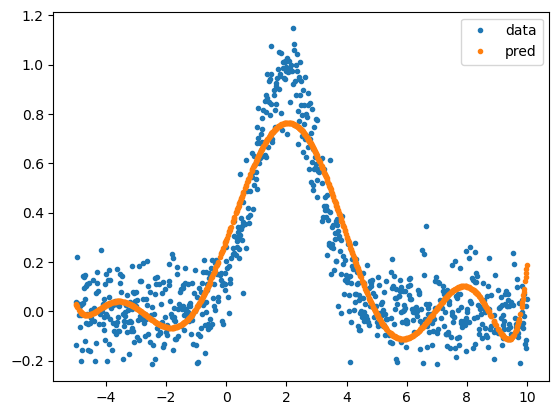

In [32]:
Y_train_pred = NL_model.predict(X_train_poly)
X_train = X_train_poly[:,1] # only original term

plt.plot(X_train, Y_train,'.', label = 'data')
plt.plot(X_train, Y_train_pred,'.', label = 'pred')
plt.legend()
plt.show

The above approximation has been done on train data. Now we have to try it on test data

In [35]:
# lets try on test data for N =8
from sklearn.metrics import mean_squared_error, r2_score
arr_mse = []
arr_r2 = []
arr_N = []

def get_mse(N):
    poly = PolynomialFeatures(degree = N, include_bias = False)
    X_poly = poly.fit_transform(X)
    X_train_poly, X_test_poly, Y_train,Y_test = train_test_split(X_poly, Y, test_size = 0.2, random_state=123)
    NL_model = LinearRegression().fit(X_train_poly, Y_train)
    Y_test_pred = NL_model.predict(X_test_poly)
    mse = mean_squared_error(Y_test, Y_test_pred)
    r2 = r2_score(Y_test, Y_test_pred)
    return mse,r2

In [38]:
arr_mse = []
arr_r2 = []
arr_N = []
for N in range(1,50): # here you can play with different values
    mse,r2 = get_mse(N)
    arr_N.append(N)
    arr_mse.append(mse)
    arr_r2.append(r2)

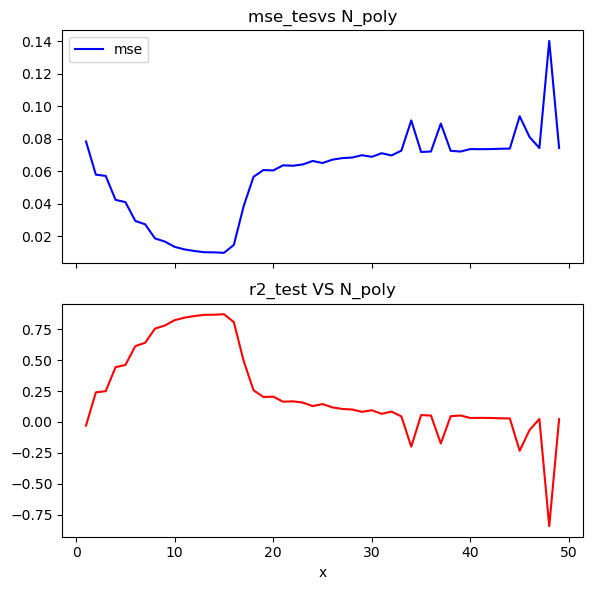

In [39]:
# Create a figure and a 2x1 grid of subplots

fig, ax = plt.subplots(nrows=2,ncols=1,sharex = True, figsize =(6,6))

# plot the first series on the top subplot
ax[0].plot(arr_N, arr_mse, label="mse", color="blue")
ax[0].set_title("mse_tesvs N_poly")
ax[0].legend()

#plot the second series on the bottom subplot
ax[1].plot(arr_N, arr_r2, label ="r2", color ="red")
ax[1].set_title("r2_test VS N_poly")
ax[1].set_xlabel("x")
ax[1].legend

#Display teh figure

plt.tight_layout()
plt.show()